In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input/results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [5]:
%%time
path = 'models/linear_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

CPU times: total: 188 ms
Wall time: 560 ms


In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

NameError: name 'history' is not defined

In [7]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 1ms/step


<h3>Classification Report</h3>

In [8]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.91304   1.00000   0.95455        21
           1    1.00000   1.00000   1.00000        18
           2    1.00000   0.95652   0.97778        23
           3    1.00000   1.00000   1.00000        20
           4    1.00000   1.00000   1.00000        23
           5    0.88889   0.80000   0.84211        20
           6    1.00000   0.95652   0.97778        23
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        25
           9    1.00000   1.00000   1.00000        13
          10    1.00000   0.73913   0.85000        23
          11    1.00000   0.94118   0.96970        17
          12    1.00000   0.93750   0.96774        16
          13    1.00000   1.00000   1.00000        31
          14    1.00000   1.00000   1.00000        30
          15    1.00000   1.00000   1.00000        19
          16    1.00000   1.00000   1.00000        25
          17    1.00000   1

<h1>Exponential Damage</h1>

In [18]:
df_exp = pd.read_csv('input/results_complete_exponential.csv')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.10, random_state=41)

In [20]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [21]:
%%time
path = 'models/exp_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.5), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                10160     
                                                                 
 dense_5 (Dense)             (None, 80)                6480      
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dense_7 (Dense)             (None, 129)               10449     
                                                                 
Total params: 33,569
Trainable params: 33,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 2s 2ms/step - loss: 4.6004 - accuracy: 0.0757 - val_loss: 4.2247 - val_accuracy: 0.1372
Epoch 2/1000
726/726 [================

INFO:tensorflow:Assets written to: models/exp_class\assets


INFO:tensorflow:Assets written to: models/exp_class\assets


CPU times: total: 4min 32s
Wall time: 16min 25s


In [22]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 773us/step


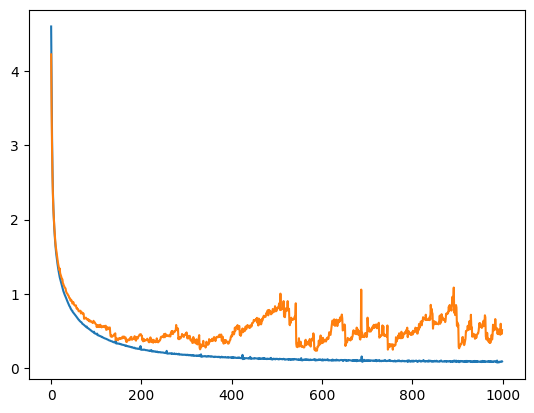

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

<h3>Classification Report</h3>

In [24]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.95455   1.00000   0.97674        21
           1    0.94444   0.94444   0.94444        18
           2    1.00000   0.95652   0.97778        23
           3    1.00000   1.00000   1.00000        20
           4    1.00000   1.00000   1.00000        23
           5    1.00000   0.50000   0.66667        20
           6    1.00000   0.95652   0.97778        23
           7    1.00000   1.00000   1.00000        25
           8    1.00000   1.00000   1.00000        25
           9    1.00000   1.00000   1.00000        13
          10    0.65714   1.00000   0.79310        23
          11    1.00000   0.94118   0.96970        17
          12    1.00000   0.93750   0.96774        16
          13    0.93939   1.00000   0.96875        31
          14    1.00000   1.00000   1.00000        30
          15    1.00000   1.00000   1.00000        19
          16    1.00000   1.00000   1.00000        25
          17    1.00000   1

<h1>Sigmoid-like Damage</h1>

In [2]:
df_sig = pd.read_csv('input/results_complete_sigmoid_like.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.10, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

In [8]:
%%time
path = 'models/sig_class'
if (os.path.exists(path)):
    model = keras.models.load_model(path)
else:
    model = keras.Sequential()
    model.add(keras.Input(shape=(126)))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal())) #80
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(80, activation=tf.keras.layers.LeakyReLU(alpha=0.4), kernel_initializer=tf.keras.initializers.HeNormal()))
    model.add(keras.layers.Dense(129, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy']) #.0001
    history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test)) #1000 epocas
    model.save(path)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                10160     
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 129)               10449     
                                                                 
Total params: 33,569
Trainable params: 33,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
726/726 [==============================] - 2s 2ms/step - loss: 4.7802 - accuracy: 0.0292 - val_loss: 4.6348 - val_accuracy: 0.0547
Epoch 2/1000
726/726 [==================

INFO:tensorflow:Assets written to: models/sig_class\assets


INFO:tensorflow:Assets written to: models/sig_class\assets


CPU times: total: 4min 38s
Wall time: 17min 34s


In [45]:
pd.DataFrame(history.history).to_csv('output/history_mlp_class_sig.csv')

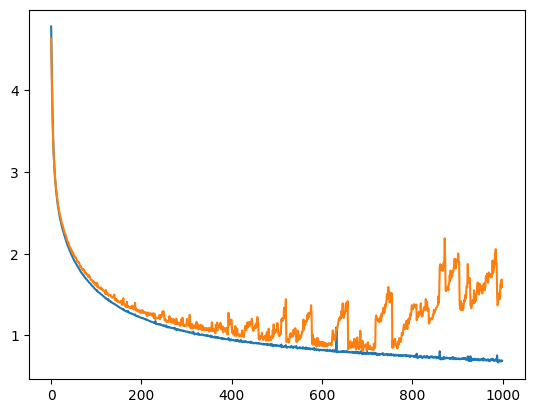

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [10]:
pred = model.predict(X_test)

81/81 [==============================] - 0s 776us/step


<h3>Classification Report</h3>

In [11]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.38095   0.55172        21
           1    0.92308   0.66667   0.77419        18
           2    1.00000   0.78261   0.87805        23
           3    0.90476   0.95000   0.92683        20
           4    0.83333   0.86957   0.85106        23
           5    0.29167   0.70000   0.41176        20
           6    0.81818   0.78261   0.80000        23
           7    1.00000   0.84000   0.91304        25
           8    1.00000   0.80000   0.88889        25
           9    0.68750   0.84615   0.75862        13
          10    0.75000   0.39130   0.51429        23
          11    0.93750   0.88235   0.90909        17
          12    0.92857   0.81250   0.86667        16
          13    0.83871   0.83871   0.83871        31
          14    1.00000   0.70000   0.82353        30
          15    1.00000   0.94737   0.97297        19
          16    1.00000   0.84000   0.91304        25
          17    0.77778   0